In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from neuropacks import ECOG
from tuning_plot_utils import *
%matplotlib inline

In [2]:
results = h5py.File('fits/ecog/ecog.h5', 'r')

In [3]:
ecog = ECOG(
    data_path='/Users/psachdeva/data/ECoG/data/r32_b7.mat',
    grid_path='/Users/psachdeva/data/ECoG/data/grdid.mat'
)

In [4]:
list(results)

['HG_1h_Lasso',
 'HG_1h_UoI_Lasso_AIC',
 'HG_1h_UoI_Lasso_BIC',
 'HG_1h_UoI_Lasso_R2',
 'HG_a1h_Lasso',
 'HG_a1h_UoI_Lasso_AIC',
 'HG_a1h_UoI_Lasso_BIC',
 'HG_a1h_UoI_Lasso_R2',
 'HG_abf_Lasso',
 'HG_abf_UoI_Lasso_AIC',
 'HG_abf_UoI_Lasso_BIC',
 'HG_abf_UoI_Lasso_R2',
 'HG_bf_Lasso',
 'HG_bf_UoI_Lasso_AIC',
 'HG_bf_UoI_Lasso_BIC',
 'HG_bf_UoI_Lasso_R2']

# Basis Functions

In [5]:
hg_bf_lasso = results['HG_bf_Lasso']
hg_bf_UoI_AIC = results['HG_bf_UoI_Lasso_AIC']
hg_bf_UoI_BIC = results['HG_bf_UoI_Lasso_BIC']
hg_bf_UoI_R2 = results['HG_bf_UoI_Lasso_R2']

In [6]:
lasso_coefs = np.mean(hg_bf_lasso['tuning_coefs'], axis=0)
lasso_intercepts = np.mean(hg_bf_lasso['intercepts'], axis=0)

uoi_r2_coefs = np.mean(hg_bf_UoI_R2['tuning_coefs'], axis=0)
uoi_r2_intercepts = np.mean(hg_bf_UoI_R2['intercepts'], axis=0)

uoi_aic_coefs = np.mean(hg_bf_UoI_AIC['tuning_coefs'], axis=0)
uoi_aic_intercepts = np.mean(hg_bf_UoI_AIC['intercepts'], axis=0)

uoi_bic_coefs = np.mean(hg_bf_UoI_BIC['tuning_coefs'], axis=0)
uoi_bic_intercepts = np.mean(hg_bf_UoI_BIC['intercepts'], axis=0)

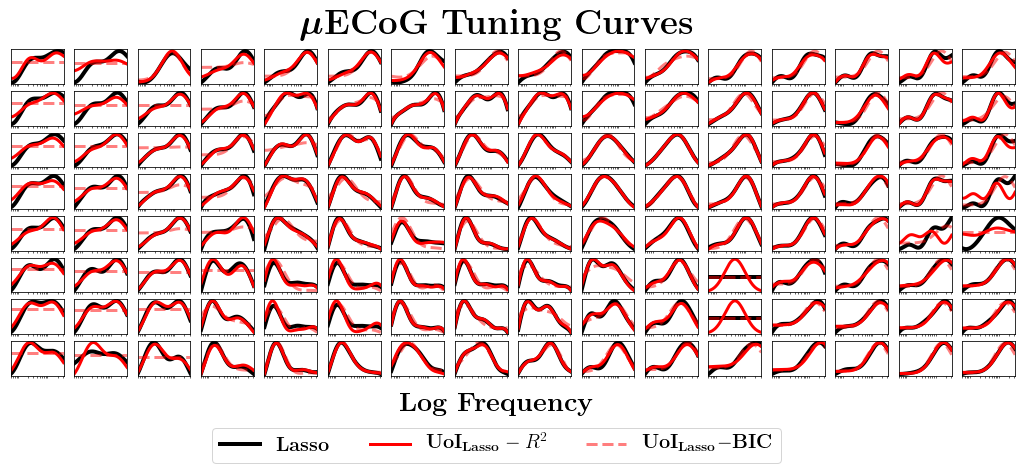

In [13]:
fig, axes = plt.subplots(8, 16, figsize=(18, 6))

for electrode in range(ecog.n_electrodes):
    x, y = ecog.get_xy_for_electrode(electrode)
    frequencies, lasso_tc = ecog.get_tuning_curve(
        tuning_coefs=lasso_coefs[electrode]
    )
    _, uoi_r2_tc = ecog.get_tuning_curve(
        tuning_coefs=uoi_r2_coefs[electrode]
    )
    _, uoi_aic_tc = ecog.get_tuning_curve(
        tuning_coefs=uoi_aic_coefs[electrode]
    )
    _, uoi_bic_tc = ecog.get_tuning_curve(
        tuning_coefs=uoi_bic_coefs[electrode]
    )
    axes[x, y].plot(
        frequencies, lasso_intercepts[electrode] + lasso_tc,
        color='k',
        linewidth=4,
        alpha=1,
        zorder=-1,
        label=r'\textbf{Lasso}'
    )
    axes[x, y].plot(
        frequencies, uoi_r2_intercepts[electrode] + uoi_r2_tc,
        color='r',
        linewidth=3,
        alpha=1,
        label=r'\textbf{UoI}$_{\textbf{Lasso}}-R^2$'
    )
    axes[x, y].plot(
        frequencies, uoi_bic_intercepts[electrode] + uoi_bic_tc,
        color='r',
        linewidth=3,
        linestyle='--',
        alpha=0.5,
        label=r'\textbf{UoI}$_{\textbf{Lasso}}-$\textbf{BIC}'
    )
    axes[x, y].set_xscale('log')
    axes[x, y].set_xlim([frequencies[0], frequencies[-1]])
    axes[x, y].set_xticks([])
    axes[x, y].set_yticks([])

fig.text(
    x=0.5, y=0.94,
    s=r'$\boldsymbol{\mu}$\textbf{ECoG Tuning Curves}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=35
)

fig.text(
    x=0.5, y=0.06,
    s=r'\textbf{Log Frequency}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=27    
)

axes[0, 0].legend(
    loc='lower center',
    bbox_transform=fig.transFigure,
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fancybox=True,
    prop={'size' : 20}
)
plt.savefig('ecog_hg_bf_tc.pdf', bbox_inches='tight')

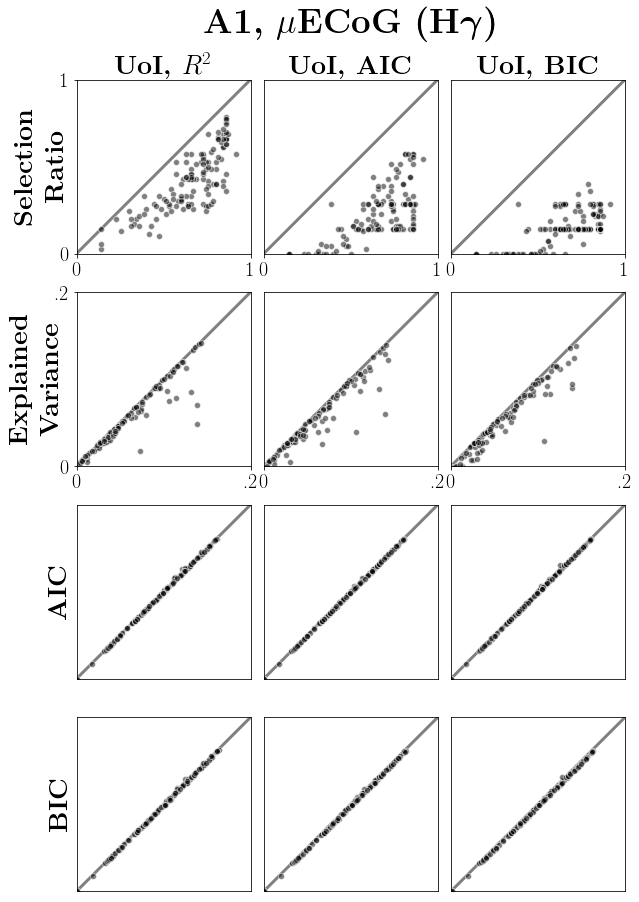

In [9]:
axes = plot_tuning_grid('fits/ecog/ecog.h5', base='HG_bf_')

# additional customizations #

# first row: selection ratio
for idx in range(3):
    axes[0, idx].set_xlim([0, 1])
    axes[0, idx].set_ylim([0, 1])
    axes[0, idx].plot([0, 1], [0, 1], color='gray', linewidth=3, zorder=-1)
    axes[0, idx].set_aspect('equal')

    axes[0, idx].set_xticks([0, 1])
    axes[0, idx].set_yticks([])

axes[0, 0].set_yticks([0, 1])

# second row: explained variance
for idx in range(3):
    axes[1, idx].set_xlim([0, .2])
    axes[1, idx].set_ylim([0, .2])
    axes[1, idx].plot([0, .2], [0, 0.2], color='gray', linewidth=3, zorder=-1)
    axes[1, idx].set_aspect('equal')

    axes[1, idx].set_xticks([0, 0.2])
    axes[1, idx].set_xticklabels([0, '.2'])
    axes[1, idx].set_yticks([])

axes[1, 0].set_yticks([0, 0.2])
axes[1, 0].set_yticklabels([0, '.2'])

# third row: AIC
for idx in range(3):
    axes[2, idx].set_xlim([-500, 1500])
    axes[2, idx].set_ylim([-500, 1500])
    axes[2, idx].plot([-500, 1500], [-500, 1500], color='gray', linewidth=3, zorder=-1)
    axes[2, idx].set_aspect('equal')

    axes[2, idx].set_xticks([])
    axes[2, idx].set_yticks([])

# fourth row: BIC
for idx in range(3):
    axes[3, idx].set_xlim([-500, 1500])
    axes[3, idx].set_ylim([-500, 1500])
    axes[3, idx].plot([-500, 1500], [-500, 1500], color='gray', linewidth=3, zorder=-1)
    axes[3, idx].set_aspect('equal')

    axes[3, idx].set_xticks([])
    axes[3, idx].set_yticks([])

# row labels
axes[0, 0].set_title(r'\textbf{UoI, $R^2$}', fontsize=27)
axes[0, 1].set_title(r'\textbf{UoI, AIC}', fontsize=27)
axes[0, 2].set_title(r'\textbf{UoI, BIC}', fontsize=27)

# column labels
axes[0, 0].set_ylabel(
    r'\textbf{Selection}' '\n' r'\textbf{Ratio}', fontsize=27,
    labelpad=-10
)
axes[1, 0].set_ylabel(
    r'\textbf{Explained}' '\n' r'\textbf{Variance}', fontsize=27,
    labelpad=-10
)
axes[2, 0].set_ylabel(r'\textbf{AIC}', fontsize=27)
axes[3, 0].set_ylabel(r'\textbf{BIC}', fontsize=27)

# overall title
plt.gcf().text(
    x=0.55, y=1.02,
    s=r'\textbf{A1, }$\mu$\textbf{ECoG (H}$\boldsymbol{\gamma}$\textbf{)}' ,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=35
)

plt.tight_layout(h_pad=0.5, w_pad=0.)
plt.savefig('ecog_hg_bf_scores.pdf', bbox_inches='tight')

# ABF Encoding

In [8]:
hg_abf_lasso = results['HG_abf_Lasso']
hg_abf_UoI_AIC = results['HG_abf_UoI_Lasso_AIC']
hg_abf_UoI_BIC = results['HG_abf_UoI_Lasso_BIC']
hg_abf_UoI_R2 = results['HG_abf_UoI_Lasso_R2']

In [9]:
lasso_coefs = np.mean(hg_abf_lasso['tuning_coefs'], axis=0)
lasso_intercepts = np.mean(hg_abf_lasso['intercepts'], axis=0)

uoi_r2_coefs = np.mean(hg_abf_UoI_R2['tuning_coefs'], axis=0)
uoi_r2_intercepts = np.mean(hg_abf_UoI_R2['intercepts'], axis=0)

uoi_aic_coefs = np.mean(hg_abf_UoI_AIC['tuning_coefs'], axis=0)
uoi_aic_intercepts = np.mean(hg_abf_UoI_AIC['intercepts'], axis=0)

uoi_bic_coefs = np.mean(hg_abf_UoI_BIC['tuning_coefs'], axis=0)
uoi_bic_intercepts = np.mean(hg_abf_UoI_BIC['intercepts'], axis=0)

In [16]:
ecog.amp_set + 8

array([ 9., 10., 11., 12., 13., 14., 15.])

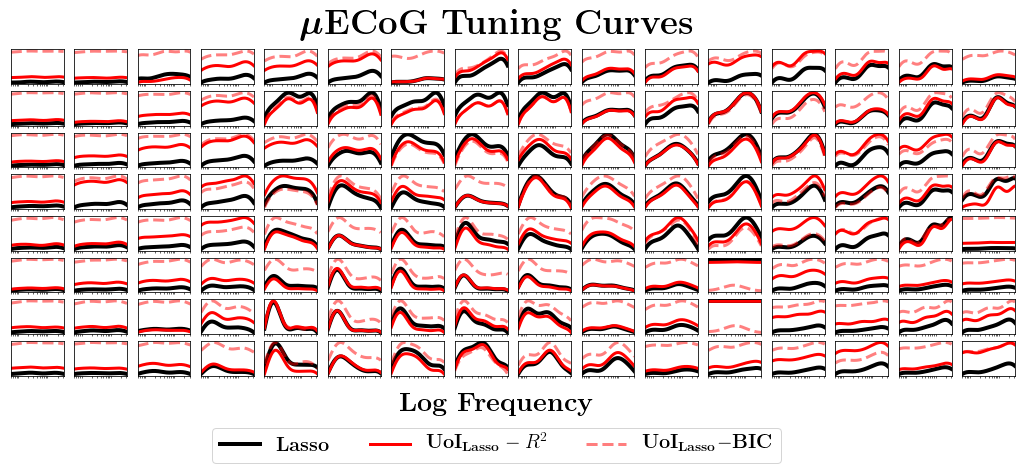

In [18]:
fig, axes = plt.subplots(8, 16, figsize=(18, 6))

for electrode in range(ecog.n_electrodes):
    x, y = ecog.get_xy_for_electrode(electrode)
    frequencies, lasso_tc = ecog.get_tuning_curve(
        tuning_coefs=lasso_coefs[electrode]/15
    )
    _, uoi_r2_tc = ecog.get_tuning_curve(
        tuning_coefs=uoi_r2_coefs[electrode]/15
    )
    _, uoi_aic_tc = ecog.get_tuning_curve(
        tuning_coefs=uoi_aic_coefs[electrode]/15
    )
    _, uoi_bic_tc = ecog.get_tuning_curve(
        tuning_coefs=uoi_bic_coefs[electrode]/15
    )
    axes[x, y].plot(
        frequencies, lasso_intercepts[electrode]/15 + lasso_tc,
        color='k',
        linewidth=4,
        alpha=1,
        zorder=-1,
        label=r'\textbf{Lasso}'
    )
    axes[x, y].plot(
        frequencies, uoi_r2_intercepts[electrode]/15 + uoi_r2_tc,
        color='r',
        linewidth=3,
        alpha=1,
        label=r'\textbf{UoI}$_{\textbf{Lasso}}-R^2$'
    )
    axes[x, y].plot(
        frequencies, uoi_bic_intercepts[electrode]/15 + uoi_bic_tc,
        color='r',
        linewidth=3,
        linestyle='--',
        alpha=0.5,
        label=r'\textbf{UoI}$_{\textbf{Lasso}}-$\textbf{BIC}'
    )
    axes[x, y].set_xscale('log')
    axes[x, y].set_xlim([frequencies[0], frequencies[-1]])
    axes[x, y].set_xticks([])
    axes[x, y].set_yticks([])

fig.text(
    x=0.5, y=0.94,
    s=r'$\boldsymbol{\mu}$\textbf{ECoG Tuning Curves}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=35
)

fig.text(
    x=0.5, y=0.06,
    s=r'\textbf{Log Frequency}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=27    
)

axes[0, 0].legend(
    loc='lower center',
    bbox_transform=fig.transFigure,
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fancybox=True,
    prop={'size' : 20}
)
#plt.savefig('ecog_hg_bf_tc.pdf', bbox_inches='tight')

# 1H Encoding

In [15]:
hg_1h_lasso = results['HG_1h_Lasso']
hg_1h_UoI_AIC = results['HG_1h_UoI_Lasso_AIC']
hg_1h_UoI_BIC = results['HG_1h_UoI_Lasso_BIC']
hg_1h_UoI_R2 = results['HG_1h_UoI_Lasso_R2']

In [16]:
lasso_coefs = np.mean(hg_1h_lasso['tuning_coefs'], axis=0)
lasso_intercepts = np.mean(hg_1h_lasso['intercepts'], axis=0)

uoi_r2_coefs = np.mean(hg_1h_UoI_R2['tuning_coefs'], axis=0)
uoi_r2_intercepts = np.mean(hg_1h_UoI_R2['intercepts'], axis=0)

uoi_aic_coefs = np.mean(hg_1h_UoI_AIC['tuning_coefs'], axis=0)
uoi_aic_intercepts = np.mean(hg_1h_UoI_AIC['intercepts'], axis=0)

uoi_bic_coefs = np.mean(hg_1h_UoI_BIC['tuning_coefs'], axis=0)
uoi_bic_intercepts = np.mean(hg_1h_UoI_BIC['intercepts'], axis=0)

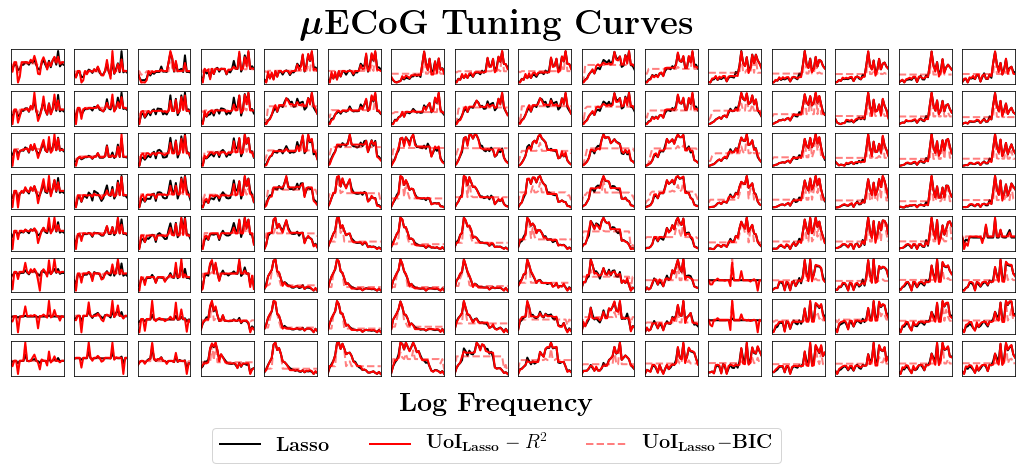

In [23]:
fig, axes = plt.subplots(8, 16, figsize=(18, 6))

frequencies = ecog.log_freq_set

for electrode in range(ecog.n_electrodes):
    x, y = ecog.get_xy_for_electrode(electrode)
    lasso_tc = lasso_coefs[electrode]
    uoi_r2_tc = uoi_r2_coefs[electrode]
    uoi_aic_tc = uoi_aic_coefs[electrode]
    uoi_bic_tc = uoi_bic_coefs[electrode]
    
    axes[x, y].plot(
        frequencies, lasso_intercepts[electrode] + lasso_tc,
        color='k',
        linewidth=2,
        alpha=1,
        zorder=-1,
        label=r'\textbf{Lasso}'
    )
    axes[x, y].plot(
        frequencies, uoi_r2_intercepts[electrode] + uoi_r2_tc,
        color='r',
        linewidth=2,
        alpha=1,
        label=r'\textbf{UoI}$_{\textbf{Lasso}}-R^2$'
    )
    axes[x, y].plot(
        frequencies, uoi_bic_intercepts[electrode] + uoi_bic_tc,
        color='r',
        linewidth=2,
        linestyle='--',
        alpha=0.5,
        label=r'\textbf{UoI}$_{\textbf{Lasso}}-$\textbf{BIC}'
    )

    axes[x, y].set_xlim([frequencies[0], frequencies[-1]])
    axes[x, y].set_xticks([])
    axes[x, y].set_xticklabels([])
    axes[x, y].set_yticks([])
    axes[x, y].set_yticklabels([])

fig.text(
    x=0.5, y=0.94,
    s=r'$\boldsymbol{\mu}$\textbf{ECoG Tuning Curves}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=35
)

fig.text(
    x=0.5, y=0.06,
    s=r'\textbf{Log Frequency}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=27    
)

axes[0, 0].legend(
    loc='lower center',
    bbox_transform=fig.transFigure,
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fancybox=True,
    prop={'size' : 20}
)
#plt.savefig('ecog_hg_bf_tc.pdf', bbox_inches='tight')

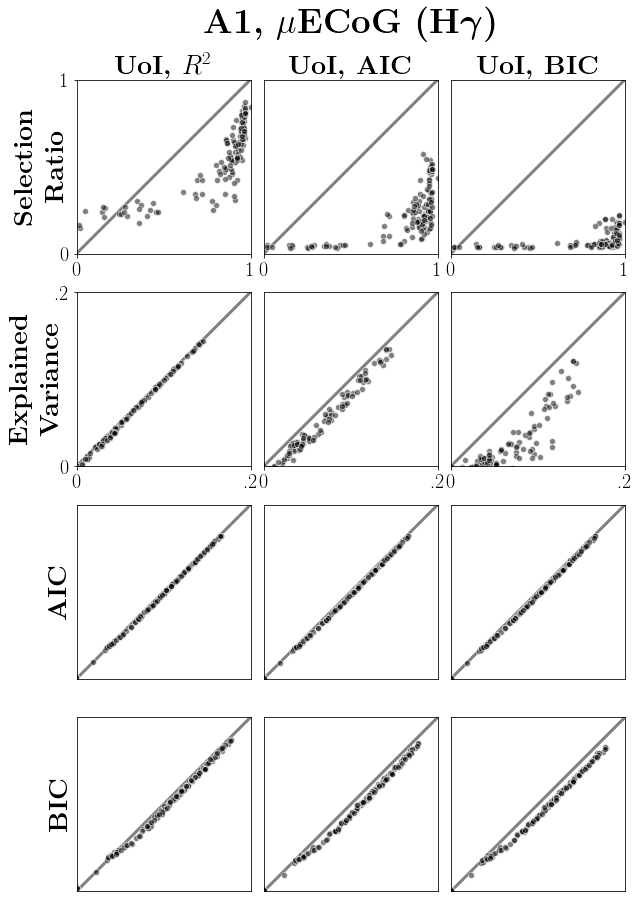

In [10]:
axes = plot_tuning_grid('fits/ecog/ecog.h5', base='HG_1h_')

# additional customizations #

# first row: selection ratio
for idx in range(3):
    axes[0, idx].set_xlim([0, 1])
    axes[0, idx].set_ylim([0, 1])
    axes[0, idx].plot([0, 1], [0, 1], color='gray', linewidth=3, zorder=-1)
    axes[0, idx].set_aspect('equal')

    axes[0, idx].set_xticks([0, 1])
    axes[0, idx].set_yticks([])

axes[0, 0].set_yticks([0, 1])

# second row: explained variance
for idx in range(3):
    axes[1, idx].set_xlim([0, .2])
    axes[1, idx].set_ylim([0, .2])
    axes[1, idx].plot([0, .2], [0, 0.2], color='gray', linewidth=3, zorder=-1)
    axes[1, idx].set_aspect('equal')

    axes[1, idx].set_xticks([0, 0.2])
    axes[1, idx].set_xticklabels([0, '.2'])
    axes[1, idx].set_yticks([])

axes[1, 0].set_yticks([0, 0.2])
axes[1, 0].set_yticklabels([0, '.2'])

# third row: AIC
for idx in range(3):
    axes[2, idx].set_xlim([-500, 1500])
    axes[2, idx].set_ylim([-500, 1500])
    axes[2, idx].plot([-500, 1500], [-500, 1500], color='gray', linewidth=3, zorder=-1)
    axes[2, idx].set_aspect('equal')

    axes[2, idx].set_xticks([])
    axes[2, idx].set_yticks([])

# fourth row: BIC
for idx in range(3):
    axes[3, idx].set_xlim([-500, 1500])
    axes[3, idx].set_ylim([-500, 1500])
    axes[3, idx].plot([-500, 1500], [-500, 1500], color='gray', linewidth=3, zorder=-1)
    axes[3, idx].set_aspect('equal')

    axes[3, idx].set_xticks([])
    axes[3, idx].set_yticks([])

# row labels
axes[0, 0].set_title(r'\textbf{UoI, $R^2$}', fontsize=27)
axes[0, 1].set_title(r'\textbf{UoI, AIC}', fontsize=27)
axes[0, 2].set_title(r'\textbf{UoI, BIC}', fontsize=27)

# column labels
axes[0, 0].set_ylabel(
    r'\textbf{Selection}' '\n' r'\textbf{Ratio}', fontsize=27,
    labelpad=-10
)
axes[1, 0].set_ylabel(
    r'\textbf{Explained}' '\n' r'\textbf{Variance}', fontsize=27,
    labelpad=-10
)
axes[2, 0].set_ylabel(r'\textbf{AIC}', fontsize=27)
axes[3, 0].set_ylabel(r'\textbf{BIC}', fontsize=27)

# overall title
plt.gcf().text(
    x=0.55, y=1.02,
    s=r'\textbf{A1, }$\mu$\textbf{ECoG (H}$\boldsymbol{\gamma}$\textbf{)}' ,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=35
)

plt.tight_layout(h_pad=0.5, w_pad=0.)
plt.savefig('ecog_hg_bf_scores.pdf', bbox_inches='tight')